In [0]:
!pip3 install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 49kB/s 
     |████████████████████████████████| 501kB 42.2MB/s 
     |████████████████████████████████| 3.1MB 70.7MB/s 


In [0]:
!pip install tensorflow-addons

     |████████████████████████████████| 993kB 8.9MB/s 
     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 3.8MB 58.0MB/s 
     |████████████████████████████████| 450kB 67.3MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Unin

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import os
import glob
import numpy as np
import numpy.random as npr
import pandas as pd
import tensorflow.keras as k
import tensorflow.keras.layers as l
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import random
from keras import optimizers

Using TensorFlow backend.


In [0]:

buffersize = 50
batchsize = 30
N_samples = 413
N_trainingsamples = 383
N_validationsamples = 30
N_prefetch = 8 
N_parallel_iteration = 4
N_testsamples = 103


"""Define 5 augmentation functions"""
@tf.function
def flip1(img):
   img_flipped = tf.image.random_flip_up_down(img)
   img = tf.cast(img_flipped, tf.float32) / 255.0
   return img

def flip2(img):
   img_flipped = tf.image.random_flip_left_right(img)
   img = tf.cast(img_flipped, tf.float32) / 255.0
   return img

    
def rotate(img):
    angles = tf.random.uniform([], minval=0, maxval=359, dtype=tf.dtypes.float32)
    img = tfa.image.rotate(img, angles, interpolation='NEAREST', name=None)
    img = tf.cast(img, tf.float32) / 255.0
    return img

def zoom(img):
    scales = list(np.arange(0.8, 1.0, 0.01))
    boxes = np.zeros((len(scales), 2))

    for i, scale in enumerate(scales):
        x1 = 0.5 - (0.5 * scale)
        y1 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1]
    # Create different crops for an image
    img = tf.image.crop_and_resize(img, boxes=boxes, box_indices=np.zeros(len(scales)), crop_size=(256, 256))
    # Create different crops for an image
    crops = tf.image.crop_and_resize([img], boxes=boxes, box_indices=np.zeros(len(scales)),
                                             crop_size=(256, 256))
    # Return a random crop
    return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]
            

def rot90(img):
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.cast(img, tf.float32) / 255.0
    return img


['IDRiD_001.jpg', 'IDRiD_002.jpg', 'IDRiD_003.jpg', 'IDRiD_004.jpg', 'IDRiD_005.jpg', 'IDRiD_006.jpg', 'IDRiD_007.jpg', 'IDRiD_008.jpg', 'IDRiD_009.jpg', 'IDRiD_010.jpg', 'IDRiD_011.jpg', 'IDRiD_012.jpg', 'IDRiD_013.jpg', 'IDRiD_014.jpg', 'IDRiD_015.jpg', 'IDRiD_016.jpg', 'IDRiD_017.jpg', 'IDRiD_018.jpg', 'IDRiD_019.jpg', 'IDRiD_020.jpg', 'IDRiD_021.jpg', 'IDRiD_022.jpg', 'IDRiD_023.jpg', 'IDRiD_024.jpg', 'IDRiD_025.jpg', 'IDRiD_026.jpg', 'IDRiD_027.jpg', 'IDRiD_028.jpg', 'IDRiD_029.jpg', 'IDRiD_030.jpg', 'IDRiD_031.jpg', 'IDRiD_032.jpg', 'IDRiD_033.jpg', 'IDRiD_034.jpg', 'IDRiD_035.jpg', 'IDRiD_036.jpg', 'IDRiD_037.jpg', 'IDRiD_038.jpg', 'IDRiD_039.jpg', 'IDRiD_040.jpg', 'IDRiD_041.jpg', 'IDRiD_042.jpg', 'IDRiD_043.jpg', 'IDRiD_044.jpg', 'IDRiD_045.jpg', 'IDRiD_046.jpg', 'IDRiD_047.jpg', 'IDRiD_048.jpg', 'IDRiD_049.jpg', 'IDRiD_050.jpg', 'IDRiD_051.jpg', 'IDRiD_052.jpg', 'IDRiD_053.jpg', 'IDRiD_054.jpg', 'IDRiD_055.jpg', 'IDRiD_056.jpg', 'IDRiD_057.jpg', 'IDRiD_058.jpg', 'IDRiD_059.jp

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


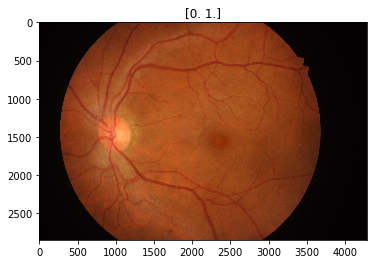

In [0]:

"""build training and validation labels before spliting"""

csv_path = "/content/drive/My Drive/Masterlab/a. IDRiD_Disease Grading_Training Labels.csv"
files_csv = pd.read_csv(csv_path, usecols=[1])


labels = np.zeros(shape=(N_samples, 2))  # save training and validation labels in one-hot coding form

csv_tensor = tf.convert_to_tensor(files_csv.values, dtype=tf.int32)
csv_tensor = tf.map_fn(lambda x: 1 if x > 1 else 0, files_csv.values)
for i in range(N_samples):
    if csv_tensor[i] == 1:
         labels[i][0] = 1
    else:
         labels[i][1] = 1


"""Read training and validation image files from folder"""
def load_file_names():
    files = glob.glob("/content/drive/My Drive/Masterlab/a. Training Set/*.jpg")
    return files


img_list = []
files = sorted(load_file_names())


"""The parse function converts a datapair(file, label) to a correspoding datapair(image, label)"""
def parse_train_function(files,labels):
    image_string = tf.io.read_file(files)
    image_decoded = tf.io.decode_jpeg(image_string)                # image is decoded
    image_resized = tf.image.resize_with_pad(image_decoded,        # image is normalized
                                             256,
                                             256)
 
    a = random.randint(1,10)              # chose a way to be augmented
    if a == 1:
      img = zoom(image_resized)
      img = tf.cast(img, tf.float32) / 255.0  
    elif a== 2:
      img = rotate(image_resized)
    elif a== 3:
      img = rot90(image_resized)
    elif a== 4:
      img = zoom(image_resized)    
    elif a== 5:
      img = flip1(image_resized)
    elif a== 6:
      img = flip2(image_resized)    
    else:
      img = image_resized  
      img = tf.cast(img, tf.float32) / 255.0       
    label = labels
    return img, label


"""validation datapair will be created as training datapair, but without data augmentation"""
def parse_val_function(files,labels): 
    image_string = tf.io.read_file(files)
    image_decoded = tf.io.decode_jpeg(image_string)
    image_resized = tf.image.resize_with_pad(image_decoded,
                                             256,
                                             256)
    img = tf.cast(image_resized, tf.float32) / 255.0
    label = labels
    return img, label

"""Build training dataset with its parse fuction"""
def build_train_ds(files, labels, batchsize):
    ds = tf.data.Dataset.from_tensor_slices((files, labels))
    ds = ds.map(parse_train_function, N_parallel_iteration)
    ds = ds.shuffle(380).batch(batchsize).repeat(-1).prefetch(N_prefetch)
    return ds


"""Build validation dataset with its parse fuction"""
def build_val_ds(files, labels, batchsize):
    ds = tf.data.Dataset.from_tensor_slices((files, labels))
    ds = ds.map(parse_val_function, N_parallel_iteration)
    ds = ds.shuffle(20).batch(30).prefetch(N_prefetch)
    return ds


"""Shuffle the index of file paths. It shortens the running time comparing to shuffling the a dataset with decoded images and labels"""
shuffle_idx = np.arange(0, N_samples)
np.random.shuffle(shuffle_idx)
files = [files[i] for i in shuffle_idx]
labels = [labels[i] for i in shuffle_idx]


"""Split the training and validation datasets by file path index"""
train_ds = build_train_ds(files[0:N_trainingsamples], labels[0:N_trainingsamples], batchsize)
val_ds = build_val_ds(files[N_trainingsamples:N_samples], labels[N_trainingsamples:N_samples], batchsize)


"""load the original images to check if file path are correct"""
img = plt.imread(files[100])
plt.imshow(img)
plt.title(labels[100])
plt.show()


In [0]:
"""Build testing dataset of images"""
N_testsamples = 103

def load_testfile_names():
    files = glob.glob("/content/drive/My Drive/Masterlab/b. Testing Set/*.jpg")
    return files


img_list_test = []
test_files = load_testfile_names()

for file in sorted(test_files):
    image_string = tf.io.read_file(file)
    image_decoded = tf.io.decode_image(image_string)
    image_resized = tf.image.resize_with_pad(image_decoded,   # Normalize image
                                             256,
                                             256)
    img = tf.cast(image_resized, tf.float32) / 255.0          # Normalize image
    img_list_test.append(img)
    
img_tensor_test = tf.convert_to_tensor(img_list_test, dtype=tf.float32)
img_test_ds = tf.data.Dataset.from_tensor_slices(img_tensor_test)


"""Load test label files"""
csv_path_test = "/content/drive/My Drive/Masterlab/b. IDRiD_Disease Grading_Testing Labels.csv"
files_csv_test = pd.read_csv(csv_path_test, usecols=[1])


t = np.zeros(shape=(103, 2))      # Build test labels in one-hot coding form
csv_tensor = tf.convert_to_tensor(files_csv_test.values, dtype=tf.float32)
csv_tensor = tf.map_fn(lambda x: 1 if x > 1 else 0, csv_tensor)
for i in range(N_testsamples):
    if csv_tensor[i] == 1:
         t[i][0] = 1
    else:
         t[i][1] = 1


"""build testing dataset of labels"""
labels_ds_test = tf.data.Dataset.from_tensor_slices(t)
test_ds = tf.data.Dataset.zip((img_test_ds, labels_ds_test)).batch(batchsize)   # Combine the image dataset and label dataset for testset together


In [0]:
# Definde the model 

class MyModel(k.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv0 = k.layers.Conv2D(16, 3,  activation='relu', input_shape=(batchsize, 256, 256, 3),padding="same")
        self.pool0 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.conv1 = k.layers.Conv2D(64, 3, activation='relu',padding="same")
        self.pool1 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop0 = k.layers.Dropout(0.3)
        self.conv2 = k.layers.Conv2D(64, 3, activation='relu',padding="same")
        self.pool2 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.conv3 = k.layers.Conv2D(128, 3, activation='relu',padding='same')
        self.pool3 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop1 = k.layers.Dropout(0.3)
        self.conv4 = k.layers.Conv2D(128, 3, activation='relu',padding='same')
        self.pool4 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop2 = k.layers.Dropout(0.3)
        self.flatten0 = k.layers.Flatten()
        self.dense0 = k.layers.Dense(512, activation="relu")
        self.drop2 = k.layers.Dropout(0.4)
        self.dense1 = k.layers.Dense(128, activation="relu")
        self.drop3 = k.layers.Dropout(0.5)
        self.dense2 = k.layers.Dense(2, activation="softmax")

    def call(self, inputs, training=False):
        output = self.conv0(inputs)
        output = self.pool0(output)
        output = self.conv1(output)
        output = self.pool1(output)
        output = self.drop0(output)
        output = self.conv2(output)
        output = self.pool2(output)      
        output = self.conv3(output)
        output = self.pool3(output)
        output = self.drop1(output)
        output = self.conv4(output)
        output = self.pool4(output)
        output = self.drop2(output)
        output = self.flatten0(output)
        output = self.dense0(output)
        output = self.drop2(output)
        output = self.dense1(output)
        output = self.drop3(output)
        output = self.dense2(output)
        return output

model = MyModel()
#opt = k.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model.build((batchsize, 256, 256, 3))
model.summary()


Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           multiple                  448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_20 (Conv2D)           multiple                  9280      
_________________________________________________________________
max_pooling2d_20 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
_________________________________________________________________
conv2d_21 (Conv2D)           multiple                  36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling multiple                  0

'class MyModel(k.Model):\n    def __init__(self):\n        super(MyModel, self).__init__()\n        self.conv0 = k.layers.Conv2D(32, 3, activation="relu", padding="same")\n        self.conv1 = k.layers.BatchNormalization()\n        self.conv2 = k.layers.Conv2D(32, 3, activation=\'relu\', padding=\'same\')\n        self.bn0 = k.layers.BatchNormalization()\n        self.pool0 = k.layers.MaxPooling2D(pool_size=(2, 2))\n\n        \n        self.conv3 = k.layers.Conv2D(128, 3, activation=\'relu\', padding=\'same\')\n        self.conv4 = k.layers.BatchNormalization()\n        self.conv5= k.layers.Conv2D(128, 3, activation=\'relu\', padding=\'same\')\n        self.bn1 = k.layers.BatchNormalization()\n        self.pool1 = k.layers.MaxPooling2D(pool_size=(2, 2))\n\n        self.conv6 = k.layers.Conv2D(256, 3, activation=\'relu\', padding=\'same\')\n        self.conv7 = k.layers.BatchNormalization()\n        self.conv8 = k.layers.Conv2D(256, 3, activation=\'relu\', padding=\'same\')\n        sel

In [0]:

# define an optimizer
#opt = k.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = k.optimizers.Adam(learning_rate=0.001)
# calculate loss and accuracy
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.BinaryAccuracy()


# using grading descent method
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = tf.keras.losses.binary_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)
    #tf.summary.scalar('train_acc', train_accuracy.result())


In [0]:
# create checkpoints

opt = tf.keras.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
manager = tf.train.CheckpointManager(ckpt, './tf_ckpts', max_to_keep=4)

def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")


In [0]:
# custom defined training step

train_iters = 0
val_acc_metric = k.metrics.BinaryAccuracy()

for t_i, t_l in train_ds.take(-1):   

    try:
	       tf.enable_eager_execution ()
    except Exception:
	       pass
    train_step(model, t_i, t_l)
    ckpt.step.assign_add(1)
    if int(ckpt.step) % 10 == 0:
      save_path = manager.save()
      print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
   
    train_iters += 1
    if train_iters % 90==0:
       for v_i,v_l in val_ds:
         v_pred = model(v_i)
         # Update val metrics
         val_acc_metric(v_l, v_pred)     
       val_acc = val_acc_metric.result()
       val_acc_metric.reset_states()
       print('Validation acc: %s' % (float(val_acc)*100))
    if train_iters == 1600:
       break
    template = 'train_iters {}, Loss: {}, Accuracy: {}'
    
    print(template.format(train_iters + 1,
                      train_loss.result(),
                      train_accuracy.result() * 100))



train_iters 2, Loss: 0.4779580235481262, Accuracy: 75.43443298339844
train_iters 3, Loss: 0.47772690653800964, Accuracy: 75.44583892822266
train_iters 4, Loss: 0.4775699973106384, Accuracy: 75.46060180664062
train_iters 5, Loss: 0.4773866534233093, Accuracy: 75.46519470214844
train_iters 6, Loss: 0.47709062695503235, Accuracy: 75.48665618896484
train_iters 7, Loss: 0.4769047200679779, Accuracy: 75.50132751464844
train_iters 8, Loss: 0.4769032299518585, Accuracy: 75.50924682617188
Saved checkpoint for step 1010: ./tf_ckpts/ckpt-101
train_iters 9, Loss: 0.47686028480529785, Accuracy: 75.50704193115234
train_iters 10, Loss: 0.476578950881958, Accuracy: 75.52501678466797
train_iters 11, Loss: 0.4764905869960785, Accuracy: 75.53287506103516
train_iters 12, Loss: 0.4761413037776947, Accuracy: 75.55413818359375
train_iters 13, Loss: 0.4760003089904785, Accuracy: 75.56865692138672
train_iters 14, Loss: 0.4758971333503723, Accuracy: 75.5673828125
train_iters 15, Loss: 0.47567838430404663, Accur

KeyboardInterrupt: ignored

In [0]:
# check the test accuracy
train_iters = 0

test_acc_metric = k.metrics.BinaryAccuracy()

true_arr = []
pred_arr = []
for i,l in test_ds:
   pred = model(i)
   p_modi = np.argmax(pred,axis=1)    # convert the onehot prediction back to class number form
   l_modi = np.argmax(l,axis=1)       
   pred_arr.append(p_modi)
   true_arr.append(l_modi)
   # Update val metrics
   test_acc_metric(l,pred)     
test_acc = test_acc_metric.result()
test_acc_metric.reset_states()
print('test acc: %s' % (float(test_acc)))   # 0.6504854559898376


"""Flatten the labels for confusion matrix"""
p_com1 = np.hstack((pred_arr[0],pred_arr[1]))
p_com2 = np.hstack((pred_arr[2],pred_arr[3]))
y_pred = np.hstack((p_com1,p_com2))             # Combine all the predicted labels together
l_com1 = np.hstack((true_arr[0],true_arr[1]))
l_com2 = np.hstack((true_arr[2],true_arr[3])) 
y_true = np.hstack((l_com1,l_com2))             # Combine all the true labels together
print("y_pred: ")
print(y_pred)
print("y_true: ")
print(y_true)

test acc: 0.7864077687263489
y_pred: 
[1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1]
y_true: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]


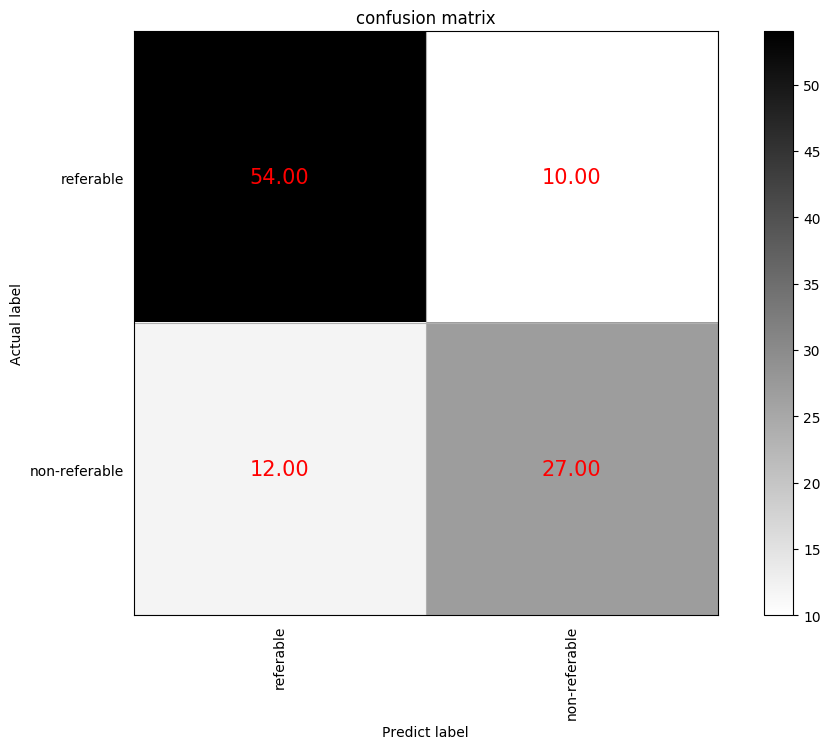

In [0]:
"""Define confusion matrix""""
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):
    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # the probabilities in confusion matrix
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')

    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()


classes = ['referable','non-referable']   # definen class for confusion matrix


# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')